### The RF algorithm comprises a random collection of forest trees. It is an addition to the decision tree algorithm. It creates a random sample of multiple decision trees and merges them together to obtain a more stable and accurate prediction through Cross validation. In general, the more trees in the forest, the more robust would be the prediction and thus higher accuracy.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
d = pd.read_csv("../input/lending-club-loan-data/loan_data.csv")
d.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Exploratory data analysis

In [19]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [20]:
d.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

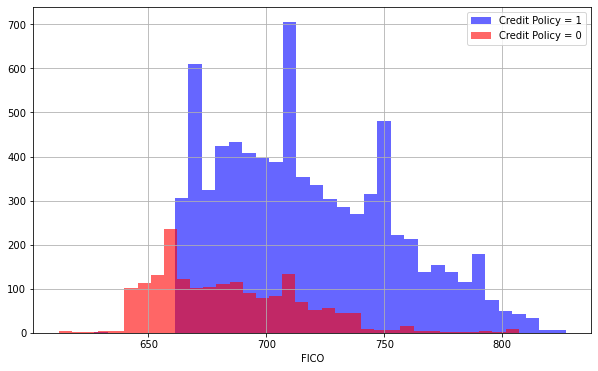

In [4]:
#this is a histogram of 2 FICO distributions on top of each other, 1 for each credit policy
plt.figure(figsize=(10,6))
d[d['credit.policy']==1]['fico'].hist(bins=35, color='blue',label='Credit Policy = 1',alpha=0.6)
d[d['credit.policy']==0]['fico'].hist(bins=35, color='red',label='Credit Policy = 0',alpha=0.6)
plt.legend()
plt.xlabel("FICO")
#from this we can see that people with credit policy=1 are more than those with 0
#anyone with a FICO score less than 660 will not meet the credit criteria of lending 

Text(0.5, 0, 'FICO')

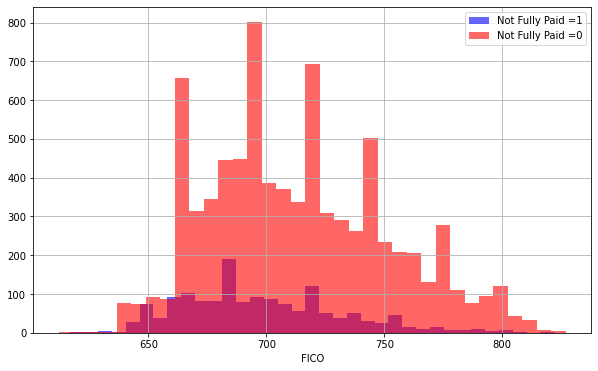

In [5]:
#now make a similar figure, except this time by the not fully paid column
plt. figure(figsize=(10,6))
d[d['not.fully.paid']==1]['fico'].hist(bins=35, color='blue',label='Not Fully Paid =1',alpha=0.6)
d[d['not.fully.paid']==0][ 'fico'].hist(bins=35,color='red',label='Not Fully Paid =0',alpha=0.6)
plt.legend() 
plt.xlabel("FICO")
#we can see that majority of the people are fully paying off their loans

<AxesSubplot:xlabel='purpose', ylabel='count'>

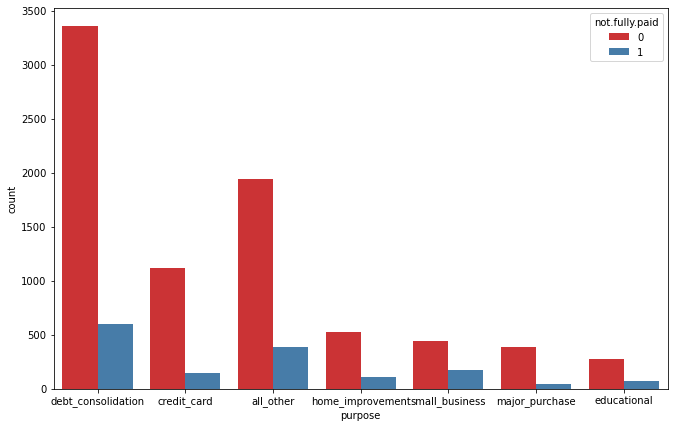

In [6]:
#now create a countplot showing the counts of loans by purpose, with the color hue defined by not fully paid
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=d, palette='Set1')
#here we can see the various reasons behind being able to pay back the full loan

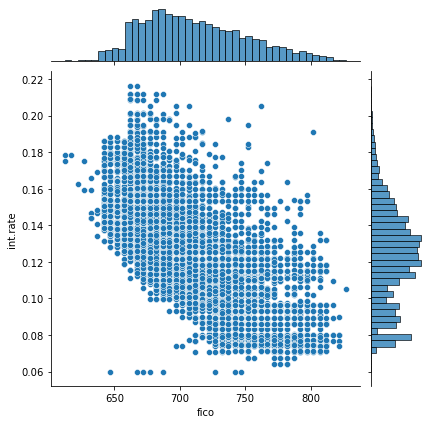

In [7]:
#see the trend between FICO score and interest rate by making a jointplot
sns.jointplot(x='fico', y='int.rate', data=d)
#as your FICO score increases you have better credit so your interest rate goes low

<Figure size 792x504 with 0 Axes>

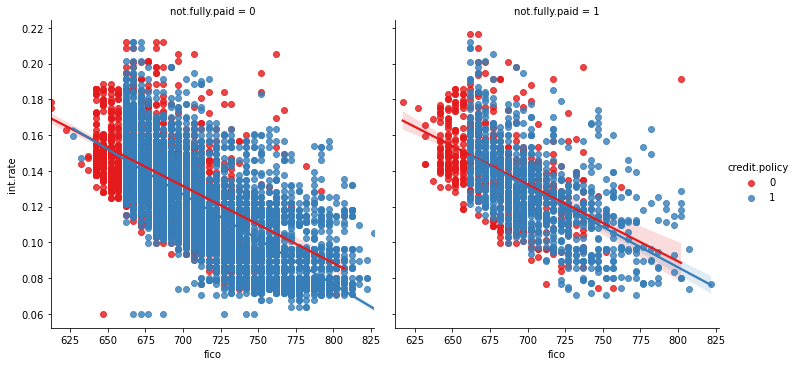

In [8]:
plt.figure(figsize=(11,7)) 
sns.lmplot(y='int.rate',x='fico', data=d, hue='credit.policy', col='not.fully.paid',palette='Set1')

In [9]:
d.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

## Data cleaning

In [10]:
d['purpose'] #this column has categorical values which needs to be transformed so that sklearn can understand it

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: object

In [11]:
#all the categories in the purpose column will be converted into each seperate column having 0 and 1 as values
cf = ['purpose']
d2 = pd.get_dummies(d, columns=cf, drop_first=True)
d2.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Model Training

In [12]:
from sklearn.model_selection import train_test_split
x = d2.drop('not.fully.paid', axis=1)
y = d2['not.fully.paid']
x_test, x_train, y_test, y_train = train_test_split(x,y,test_size=0.3, random_state=101)

In [13]:
#train a decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree =  DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
#making predictions
pr = dtree.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5614
           1       0.22      0.22      0.22      1090

    accuracy                           0.74      6704
   macro avg       0.53      0.53      0.53      6704
weighted avg       0.75      0.74      0.75      6704



In [15]:
print(confusion_matrix(y_test,pr))

[[4743  871]
 [ 846  244]]


In [16]:
#training the random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [17]:
pr2 = rfc.predict(x_test)
print(classification_report(y_test,pr2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      5614
           1       0.33      0.01      0.02      1090

    accuracy                           0.84      6704
   macro avg       0.58      0.50      0.47      6704
weighted avg       0.76      0.84      0.77      6704



In [18]:
print(confusion_matrix(y_test,pr2))

[[5585   29]
 [1076   14]]
